<a href="https://colab.research.google.com/github/Ha-minss/Personal-Projects/blob/main/QS%20World%20University%20Rankings%3A%20Overall%20Score%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import files
files.upload()  # 여기서 kaggle.json 파일 선택

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ehdgk0725","key":"efa68270d8926dcaeb86446184e814ea"}'}

In [3]:
# 1) ~/.kaggle 디렉토리 생성
!mkdir -p ~/.kaggle

# 2) 업로드된 kaggle.json을 이동
!cp kaggle.json ~/.kaggle/

# 3) 권한 설정 (안전하게 읽기 전용)
!chmod 600 ~/.kaggle/kaggle.json

# 4) Kaggle API 클라이언트 설치
!pip install -q kaggle

In [4]:
# Download latest version
path = kagglehub.dataset_download("akashbommidi/2026-qs-world-university-rankings")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/2026-qs-world-university-rankings


In [5]:
!kaggle datasets download -d akashbommidi/2026-qs-world-university-rankings
!unzip -q 2026-qs-world-university-rankings.zip -d data
print("data 폴더 내용:", os.listdir("data"))

Dataset URL: https://www.kaggle.com/datasets/akashbommidi/2026-qs-world-university-rankings
License(s): other
2026-qs-world-university-rankings.zip: Skipping, found more recently modified local copy (use --force to force download)
replace data/2026 QS World University Rankings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
data 폴더 내용: ['2026 QS World University Rankings.csv']


In [6]:
df = pd.read_csv('data/2026 QS World University Rankings.csv')

# **Exploratory Data Analysis — EDA**

In [7]:
df.head(15)

,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,...,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,100.0,...,153,92.3,130,94.1,98,100.0,7,93.8,33,100
1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,99.6,...,35,100.0,22,97.5,28,95.9,68,98.3,7=,99.4
2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,261,76.1,230,96.5,49,100.0,2,95.4,19=,98.9
3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,100.0,...,80,98.7,67,100.0,1,100.0,3,77.9,198=,97.9
4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,217,60.6,335,99.4,8,100.0,1,77.8,201=,97.7
5,6,5,University of Cambridge,United Kingdom,Europe,L,FC,VH,Public,100.0,...,144,93.6,120,99.2,12,100.0,5,78.4,194,97.2
6,7,7,ETH Zurich (Swiss Federal Institute of Technol...,Switzerland,Europe,L,FO,VH,Public,99.7,...,58,73.9,241,95.8,64,95.0,76,99.6,2,96.7
7,8,8,National University of Singapore (NUS),Singapore,Asia,XL,FC,VH,Public,99.9,...,101,72.1,253,92.4,140,100.0,9,90.0,63=,95.9
8,9,9,UCL (University College London),United Kingdom,Europe,XL,FC,VH,Public,99.9,...,27,100.0,17,99.9,2,89.3,111,98.5,5=,95.8
9,10,10,California Institute of Technology (Caltech),United States of America,Americas,S,FO,VH,Private not for Profit,98.3,...,161,91.4,136,61.8,665,49.1,352,79.2,185,94.3


In [8]:
df.tail()

,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,...,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
1496,1401+,1201-1400,University of West Bohemia,Czechia,Europe,M,CO,VH,Public,7.2,...,801+,4.8,801+,40.9,801+,15.5,801+,19.5,801+,-
1497,1401+,1201-1400,Voronezh State University,Russian Federation,Europe,L,CO,HI,Public,5.7,...,546,40.2,502,12.2,801+,3.5,801+,20.4,801+,-
1498,1401+,NaN,Walailak University,Thailand,Asia,L,FC,MD,Public,8.3,...,801+,7.4,801+,31.5,801+,3.2,801+,43.0,801+,-
1499,1401+,1201-1400,Yamaguchi University,Japan,Asia,M,FC,HI,Public,4.4,...,801+,8.9,801+,15.4,801+,1.7,801+,22.5,801+,-
1500,1401+,1201-1400,Youngsan University,Republic of Korea,Asia,M,SP,MD,Private for Profit,6.5,...,658,24.7,689,2.5,801+,1.9,801+,11.5,801+,-


In [9]:
df.shape

(1501, 30)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   2026 Rank          1501 non-null   object 
 1   Previous Rank      1389 non-null   object 
 2   Institution Name   1501 non-null   object 
 3   Country/Territory  1501 non-null   object 
 4   Region             1501 non-null   object 
 5   Size               1500 non-null   object 
 6   Focus              1501 non-null   object 
 7   Research           1500 non-null   object 
 8   Status             1454 non-null   object 
 9   AR SCORE           1501 non-null   float64
 10  AR RANK            1501 non-null   object 
 11  ER SCORE           1501 non-null   float64
 12  ER RANK            1501 non-null   object 
 13  FSR SCORE          1501 non-null   float64
 14  FSR RANK           1501 non-null   object 
 15  CPF SCORE          1501 non-null   float64
 16  CPF RANK           1501 

In [11]:
df.columns

Index(['2026 Rank', 'Previous Rank', 'Institution Name', 'Country/Territory',
       'Region', 'Size', 'Focus', 'Research', 'Status', 'AR SCORE', 'AR RANK',
       'ER SCORE', 'ER RANK', 'FSR SCORE', 'FSR RANK', 'CPF SCORE', 'CPF RANK',
       'IFR SCORE', 'IFR RANK', 'ISR SCORE', 'ISR RANK', 'ISD SCORE',
       'ISD RANK', 'IRN SCORE', 'IRN RANK', 'EO SCORE', 'EO RANK', 'SUS SCORE',
       'SUS RANK', 'Overall SCORE'],
      dtype='object')

In [12]:
df.isnull().sum()

,0
2026 Rank,0
Previous Rank,112
Institution Name,0
Country/Territory,0
Region,0
Size,1
Focus,0
Research,1
Status,47
AR SCORE,0


In [13]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1496,False
1497,False
1498,False
1499,False


In [14]:
df.describe()

,AR SCORE,ER SCORE,FSR SCORE,CPF SCORE,IFR SCORE,ISR SCORE,ISD SCORE,IRN SCORE,EO SCORE,SUS SCORE
count,1501.000000,1501.000000,1501.000000,1501.000000,1414.000000,1464.00000,1464.000000,1499.000000,1501.000000,1477.000000
mean,25.785943,26.944237,33.950433,30.425516,36.305658,33.32541,34.526981,53.356905,29.989674,51.254367
std,24.500905,25.504494,28.440071,29.679882,35.252024,32.75066,31.108600,28.920632,29.197573,21.266331
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,3.000000
25%,8.800000,8.500000,10.800000,6.000000,6.600000,5.90000,8.675000,27.500000,6.200000,35.700000
50%,16.000000,16.500000,23.500000,18.000000,20.100000,19.40000,21.700000,55.800000,17.900000,48.700000
75%,32.700000,37.500000,50.500000,49.700000,66.100000,56.70000,55.650000,78.500000,46.000000,66.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


# **Feature Engineering**


In [15]:
df.drop(columns = ['Institution Name','Country/Territory','Region'], inplace = True)

In [16]:
def cleaned_ranking(val):
    if isinstance(val, str):
        v = val.strip()
        if v.startswith('='):
            return int(v.lstrip('='))
        elif '-' in v:
            a, b = map(int, v.split('-'))
            return int((a + b) / 2)
        elif '+' in v:
            return int(v.rstrip('+'))
        else:
            try:
                return int(v)
            except:
                return np.nan
    return np.nan

In [17]:
rank_cols = [
    '2026 Rank', 'Previous Rank',
    'AR RANK', 'ER RANK', 'FSR RANK', 'CPF RANK',
    'IFR RANK', 'ISR RANK', 'ISD RANK', 'IRN RANK',
    'EO RANK', 'SUS RANK'
]

for col in rank_cols:
  df[col+ "_int"] = df[col].apply(cleaned_ranking)

In [18]:
score_cols = [
    'AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE',
    'IFR SCORE', 'ISR SCORE', 'ISD SCORE', 'IRN SCORE',
    'EO SCORE', 'SUS SCORE', 'Overall SCORE'
]
for col in score_cols:
    # 1) '-' 또는 '_' 등의 결측 표시를 NaN으로 바꿔주고
    df[col] = df[col].replace(['-', '_'], np.nan)
    # 2) pd.to_numeric으로 숫자로 변환 (변환되지 않는 건 NaN 처리)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # 3) NaN을 중앙값(median)으로 채우기
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-18-4140212523.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [19]:
# 4) 범주형(Size, Focus, Research, Status) 최빈값 대체
cat_cols = ['Size', 'Focus', 'Research', 'Status']
imp_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imp_cat.fit_transform(df[cat_cols])

# 5) 원본 랭킹 문자열 컬럼 삭제
df.drop(columns=rank_cols, inplace=True)

In [21]:
rank_int_cols = [
    'Previous Rank_int',
    'IFR RANK_int', 'ISR RANK_int', 'ISD RANK_int',
    'IRN RANK_int', 'SUS RANK_int'
]

# 2) SimpleImputer로 중앙값 전략 설정
imp = SimpleImputer(strategy='median')

# 3) fit_transform 한 번으로 결측 채우기
df[rank_int_cols] = imp.fit_transform(df[rank_int_cols])

# 4) (선택) 모두 정수형(int)으로 바꾸기
for c in rank_int_cols:
    df[c] = df[c].astype(int)

# 5) 확인
print(df[rank_int_cols].isnull().sum())   # 모두 0이 되어야 함
print(df[rank_int_cols].dtypes)          # 모두 int64

Previous Rank_int    0
IFR RANK_int         0
ISR RANK_int         0
ISD RANK_int         0
IRN RANK_int         0
SUS RANK_int         0
dtype: int64
Previous Rank_int    int64
IFR RANK_int         int64
ISR RANK_int         int64
ISD RANK_int         int64
IRN RANK_int         int64
SUS RANK_int         int64
dtype: object


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Size               1501 non-null   object 
 1   Focus              1501 non-null   object 
 2   Research           1501 non-null   object 
 3   Status             1501 non-null   object 
 4   AR SCORE           1501 non-null   float64
 5   ER SCORE           1501 non-null   float64
 6   FSR SCORE          1501 non-null   float64
 7   CPF SCORE          1501 non-null   float64
 8   IFR SCORE          1501 non-null   float64
 9   ISR SCORE          1501 non-null   float64
 10  ISD SCORE          1501 non-null   float64
 11  IRN SCORE          1501 non-null   float64
 12  EO SCORE           1501 non-null   float64
 13  SUS SCORE          1501 non-null   float64
 14  Overall SCORE      1501 non-null   float64
 15  2026 Rank_int      1501 non-null   int64  
 16  Previous Rank_int  1501 

# **Visualization**

In [28]:
num_df = df.select_dtypes(include =["int64", "float64"])
corr_matrix = num_df.corr()

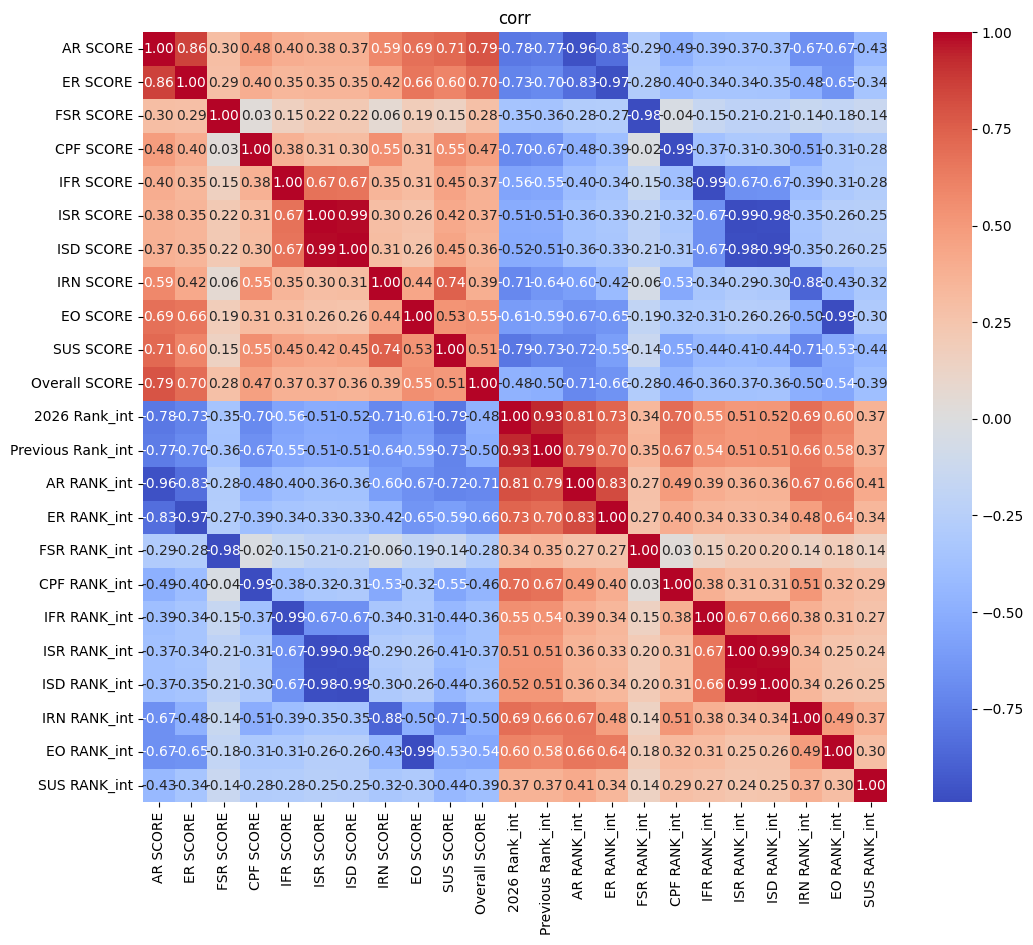

In [30]:
plt.figure(figsize= (12,10))
sns.heatmap(corr_matrix, annot =True, fmt =".2f", cmap = "coolwarm")
plt.title("corr")
plt.show()

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_num = df.select_dtypes(include=['int64','float64'])
vif = pd.Series([variance_inflation_factor(X_num.values, i)
                 for i in range(X_num.shape[1])],
                index=X_num.columns)
print(vif.sort_values(ascending=False).head(10))

ISR RANK_int     1134.750888
ISD RANK_int     1021.734061
ISR SCORE         399.686496
ISD SCORE         384.255859
CPF RANK_int      319.261026
IFR RANK_int      260.536611
EO RANK_int       199.457824
FSR RANK_int      175.243691
2026 Rank_int     155.004233
ER RANK_int       154.125318
dtype: float64


# **Encoding** & Modeling

In [31]:
df = pd.get_dummies(df,
                    columns=['Size','Focus','Research','Status'],
                    prefix=['Size','Focus','Research','Status'],
                    drop_first=True)  # 첫 번째 레이블을 drop하여 다중공선성 완화

In [61]:
X = df.drop(columns=['Overall SCORE'])
y = df['Overall SCORE']

In [62]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

In [64]:
rf = RandomForestRegressor(n_estimators = 100, random_state =42)
rf.fit(X_train_scaled ,y_train)
y_pred_rf = rf.predict(X_val_scaled)

In [65]:
xgb = XGBRegressor(n_estimators =100, learning_rate = 0.1, random_state = 42, verbosity=0)
xgb.fit(X_train_scaled ,y_train)
y_pred_xgb = xgb.predict(X_val_scaled)

In [66]:
# 평가 함수 정의
def eval_model(y_true, y_pred, name):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
    r2   = r2_score(y_true, y_pred)
    print(f"=== {name} ===")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²   : {r2:.4f}\n")

# 올바른 호출
eval_model(y_val, y_pred_rf,  "RandomForestRegressor")
eval_model(y_val, y_pred_xgb, "XGBRegressor")


=== RandomForestRegressor ===
MAE : 0.0637
RMSE: 0.1767
R²   : 0.9998

=== XGBRegressor ===
MAE : 0.0837
RMSE: 0.1767
R²   : 0.9998



In [67]:
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("RF CV RMSE:", -scores.mean())
scores_xgb = cross_val_score(
    xgb, X_train_scaled, y_train,
    scoring='neg_root_mean_squared_error',
    cv=5
)
print("XGB CV RMSE:", -scores_xgb.mean())

RF CV RMSE: 0.18654588522615495
XGB CV RMSE: 0.2953323664584276
